# 공공 인공지능 Open API 활용

* 2022.01.20 Colab 접속 불가능

In [3]:
# from google.colab import files
# up = files.upload()

In [4]:
with open('etriaikey.txt') as f:
    ai_key = f.read()

## 객체 검출

* 하나의 이미지 검출

In [5]:
img_file =  '사진/cat.jfif'
img_type = img_file.split('.')[-1]
img_type

'jfif'

In [6]:
# JFIF 타입은 JPG로 변경
img_type = 'jpg' if img_type == 'jfif' else img_type

In [7]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [8]:
with open(img_file, "rb") as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [9]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [10]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [11]:
print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)

[responseCode] 200
[responBody]
b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.995404","x":"31","y":"40","width":"184","height":"129"}]}}'


In [12]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'cat',
    'confidence': '0.995404',
    'x': '31',
    'y': '40',
    'width': '184',
    'height': '129'}]}}

In [13]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'cat',
 'confidence': '0.995404',
 'x': '31',
 'y': '40',
 'width': '184',
 'height': '129'}

## 시각화

In [14]:
from PIL import Image, ImageDraw, ImageFont 
import matplotlib.pyplot as plt 
%matplotlib inline

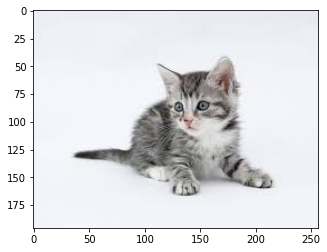

In [15]:
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [18]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))

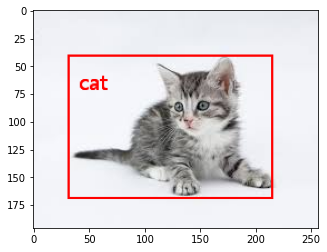

In [19]:
plt.imshow(image)
plt.show()